# Gradient Descent on Linear Regression with Scikit-Learn 
## Batch Gradient Descent
(Play around with the learning rates to see how the convergence rate varies)

[[3.8351989 ]
 [3.02313433]]


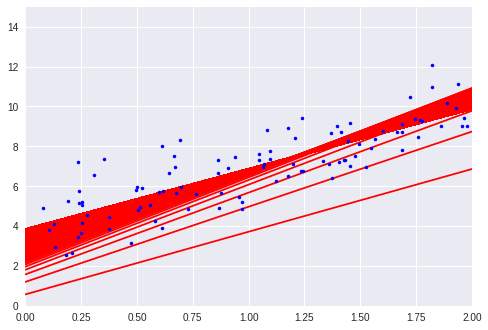

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = 2* np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)), X]


eta = 0.1 #learning rate 
n_iterations = 1000
m= 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y )
  theta = theta - eta*gradients
  X_new = np.array([[0],[2]])
  X_new_b = np.c_[np.ones((2,1)), X_new]
  y_pred = X_new_b.dot(theta)
  plt.plot(X_new, y_pred, "r-")
  
print(theta)


plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

##Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance unlike Batch Gradient Descent which uses the whole training set to compute the gradient. 

However due to SGD's stochastic (random) behavior the cost function will bounce up and down, decreasing only on average but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal. 



[[3.82917178]
 [3.0253215 ]]


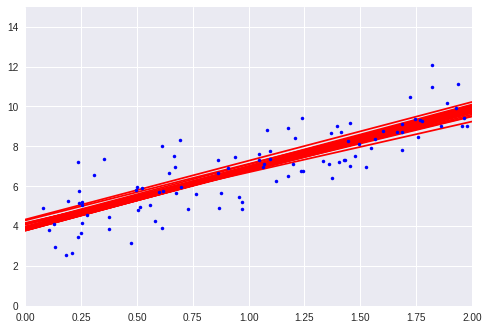

In [9]:
# Below we will implement Stochastic Gradient Descent while gradually decreasing
# the learning rate as the algorithm progresses

n_epochs = 50
t0, t1 = 5 , 50 

def learning_schedule(t):
  return t0/ (t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index: random_index+1]
    yi = y[random_index: random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch*m + i)
    theta = theta - eta* gradients
  
  X_new = np.array([[0],[2]])
  X_new_b = np.c_[np.ones((2,1)), X_new]
  y_pred = X_new_b.dot(theta)
  plt.plot(X_new, y_pred, "r-")

print(theta)
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()




### Using Sci-kit Learn's *SGDRegressor* class


In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0=0.1, tol = None)
sgd_reg.fit(X, y.ravel() )

print(sgd_reg.intercept_, sgd_reg.coef_)

[3.79784532] [2.96316387]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


##Mini-batch Gradient Descent
At each step, Mini-Batch Gradient Descent instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini batch GD computes the gradients on small random sets of instances called mini-batches.



#Polynomial Regression
A linear model can be used to fit non-linear data . We can just add powers of each feature as new features, then train a linear model on this extended feature set.



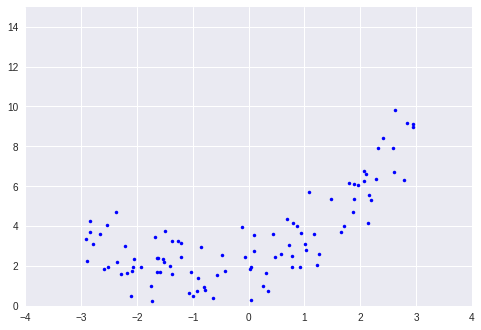

In [18]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X,y, "b.")
plt.axis([-4,4,0,15])
plt.show()